# Continuous Photobleaching (CP)

$I(t) = I_0 e^{(-Bt)} + I_{Bg}$

$I(t) = I_0 e^{-x \sqrt{B/D}} + I_{Bg}$

where $I_0 , I_{Bg}, B, D$ are fitting parameters.

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io, filters

### Read the movie stack and display average and histogram.

Data shape = (580, 672, 654)
The baseline removed = 273.0


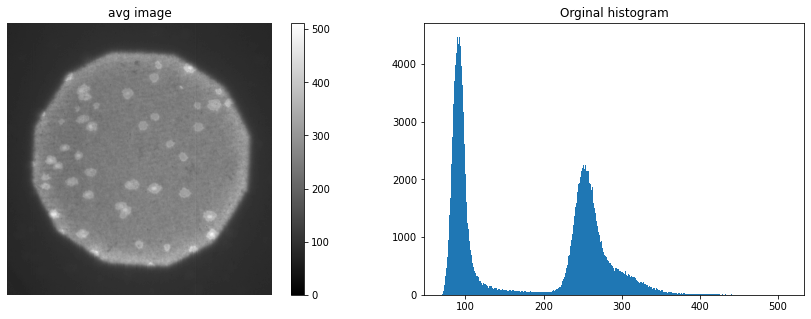

In [2]:
# Read the movie stack
stack = io.imread("data/20210928_BioAvidin_negative/movie-600-fast2.tif")[20:, 200:-130, 180:-170].astype(np.float64)

# Print the dimension of the stack
print('Data shape =',stack.shape)

# Remove the baseline
print('The baseline removed =', stack.min())
stack -= stack.min()

# display the average and it's histogram
plt.figure(figsize=(15,5))

# Average the movie
avg = np.mean(stack, axis=0)

plt.subplot(121)
plt.axis('off')
plt.title('avg image')
plt.imshow(avg, cmap = "gray", vmin=0)
plt.colorbar();

plt.subplot(122)
plt.title('Orginal histogram')
plt.hist(avg.ravel(), bins = 1000);
#plt.xlim(300,800);

### Remove the base line then display the Begining and the End of the stack with better contrast

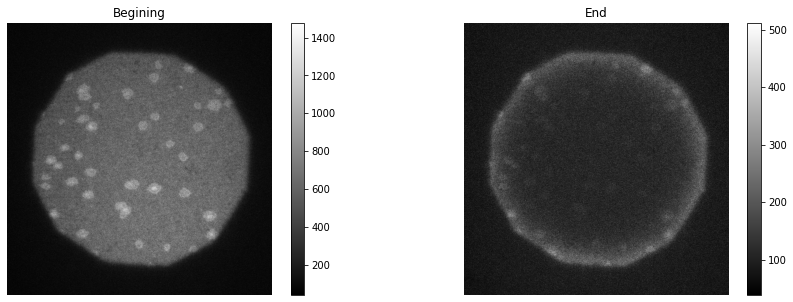

In [3]:
# display the image with better brightness and contrast
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.axis('off')
plt.title('Begining')
plt.imshow(stack[:5].mean(axis = 0), cmap = "gray")
plt.colorbar();

plt.subplot(122)
plt.axis('off')
plt.title('End')
plt.imshow(stack[-5:].mean(axis = 0), cmap = "gray")
plt.colorbar();

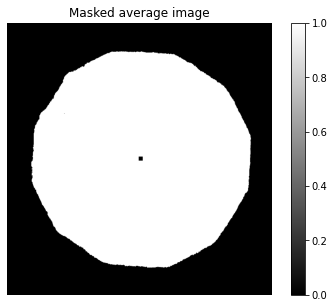

In [7]:
# Getting the threshold of edge filtered image
threshold = filters.threshold_otsu(avg)

# Making a binary mask image with 0 and 1 values
mask = np.multiply(avg > threshold, 1)

# Measure the center of mass for the mask and transform it into integer array.
center = ndimage.measurements.center_of_mass(mask)
center = np.array([int(center[0]), int(center[1])])

# Draw the center on the mask
mask[center[0]-5:center[0]+5, center[1]-5:center[1]+5] = 0

# display the image with better brightness and contrast
plt.figure(figsize=(7,5))
plt.axis('off')
plt.title('Masked average image')
plt.imshow(mask, cmap = "gray")
plt.colorbar();